In [41]:
%load_ext autoreload
%autoreload 2

import torch

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import nn4n
from nn4n.model import CTRNN
from nn4n.structure import MultiAreaEI

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## CTRNN under default settings

Linear Layer: 
   | input_dim:  1
   | output_dim: 100
   | dist:       uniform
   | bias:       True
   | shape:      torch.Size([100, 1])
   | weight_min: -0.9864406585693359
   | weight_max: 0.9996581077575684
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   1



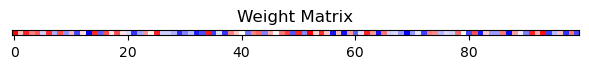

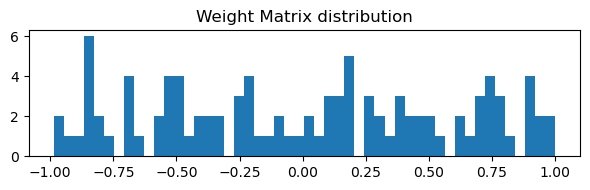

Recurrence: 
   | hidden_min:    0.0
   | hidden_max:    0.0
   | hidden_mean:   0.0
   | preact_noise:  0
   | postact_noise: 0
   | activation:    relu
   | alpha:         0.1

Hidden Layer: 
   | self_connections: False
   | input/output_dim: 100
   | distribution:     normal
   | bias:             True
   | dale:             False
   | shape:            torch.Size([100, 100])
   | weight_min:       -0.39930158853530884
   | weight_max:       0.3674481213092804
   | weight_mean:      0.0005611397209577262
   | bias_min:         0.0
   | bias_max:         0.0
   | sparsity:         0.9900000095367432
   | scaling:          1.0



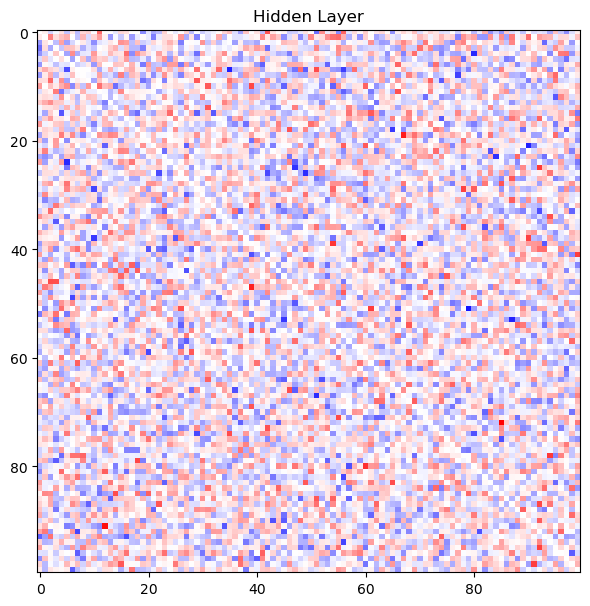

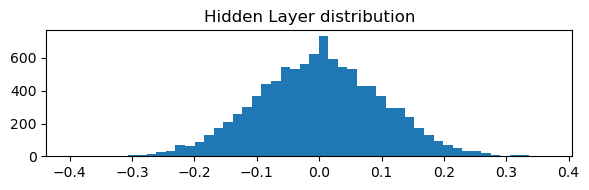

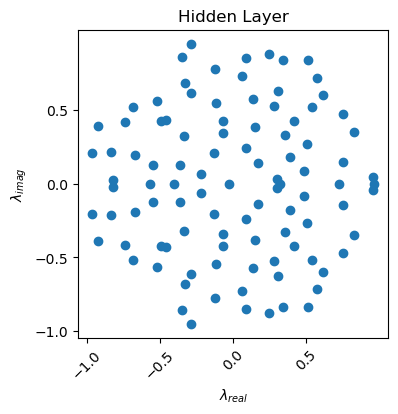

Linear Layer: 
   | input_dim:  100
   | output_dim: 1
   | dist:       uniform
   | bias:       True
   | shape:      torch.Size([1, 100])
   | weight_min: -0.09560777992010117
   | weight_max: 0.0995284840464592
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   1



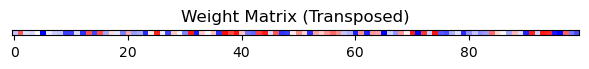

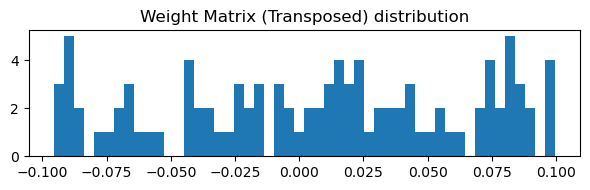

In [49]:
rnn = CTRNN()
rnn.print_layers()

## Positive value only in the hidden layer

Linear Layer: 
   | input_dim:  1
   | output_dim: 100
   | dist:       uniform
   | bias:       True
   | shape:      torch.Size([100, 1])
   | weight_min: -0.9788589477539062
   | weight_max: 0.9863134622573853
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   1



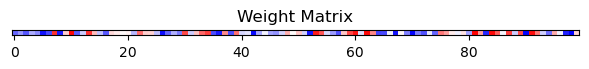

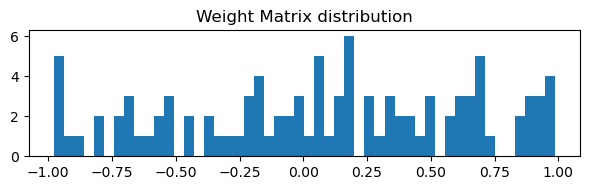

Recurrence: 
   | hidden_min:    0.0
   | hidden_max:    0.0
   | hidden_mean:   0.0
   | preact_noise:  0
   | postact_noise: 0
   | activation:    relu
   | alpha:         0.1

Hidden Layer: 
   | self_connections: False
   | input/output_dim: 100
   | distribution:     normal
   | bias:             True
   | dale:             False
   | shape:            torch.Size([100, 100])
   | weight_min:       0.0
   | weight_max:       0.3668190836906433
   | weight_mean:      0.18155112862586975
   | bias_min:         0.0
   | bias_max:         0.0
   | sparsity:         0.9900000095367432
   | scaling:          1.0



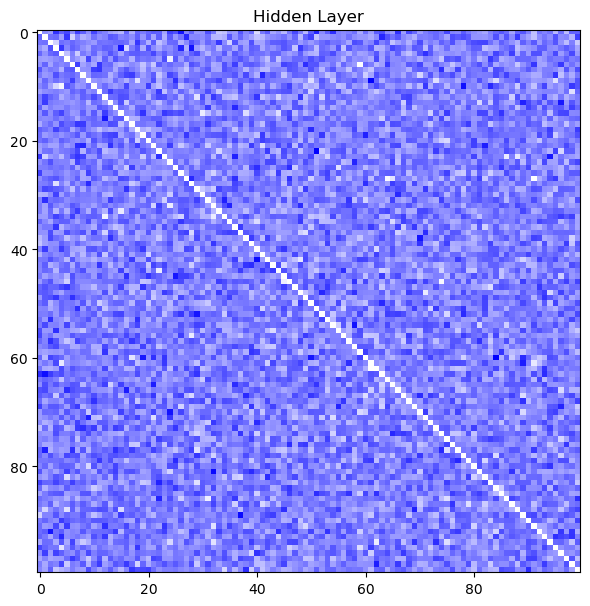

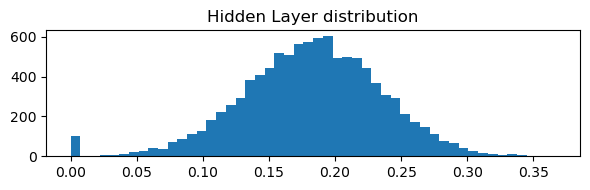

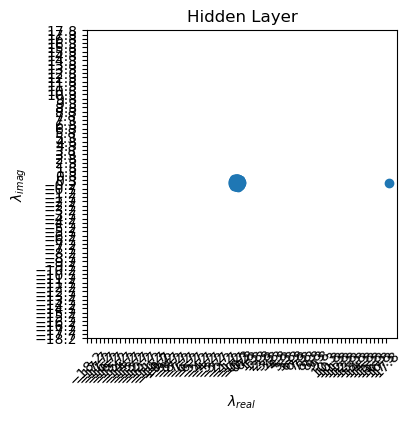

Linear Layer: 
   | input_dim:  100
   | output_dim: 1
   | dist:       uniform
   | bias:       True
   | shape:      torch.Size([1, 100])
   | weight_min: -0.09839093685150146
   | weight_max: 0.09957192093133926
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   1



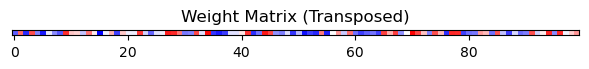

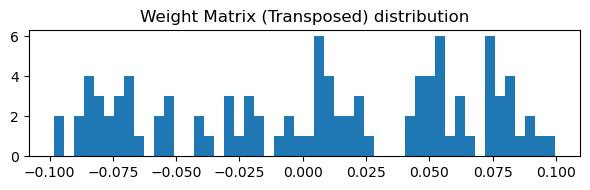

In [50]:
rnn = CTRNN(allow_negative=[True, False, True])
rnn.print_layers()

## Train on a simple sin wave prediction task

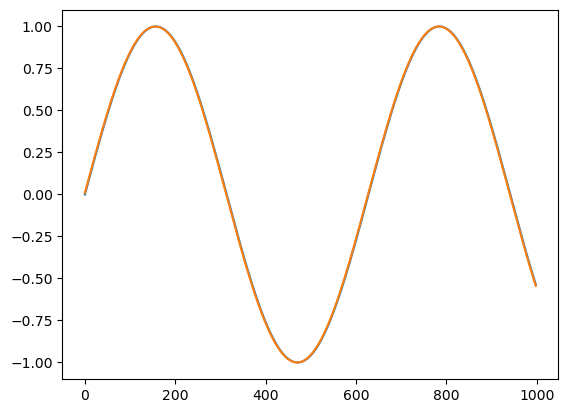

In [44]:
# predict sin wave
inputs = np.sin(np.linspace(0, 10, 1000))
inputs = torch.from_numpy(inputs).float().unsqueeze(1).unsqueeze(1)
labels = inputs[1:]
inputs = inputs[:-1]

plt.plot(inputs.squeeze(1).squeeze(1).numpy())
plt.plot(labels.squeeze(1).squeeze(1).numpy())
plt.show()

In [45]:
rnn = CTRNN(input_dim=1, hidden_size=10, output_dim=1)
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.001)

losses = []
for epoch in range(500):
    outputs, states = rnn(inputs)
    loss = torch.nn.MSELoss()(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 50 == 0:
        print(f'Epoch {epoch} Loss {loss.item()}')


Epoch 0 Loss 0.4779755175113678
Epoch 50 Loss 0.25456103682518005
Epoch 100 Loss 0.08206549286842346
Epoch 150 Loss 0.011410027742385864
Epoch 200 Loss 0.0005844375700689852
Epoch 250 Loss 0.00042125291656702757
Epoch 300 Loss 0.00033951413934119046
Epoch 350 Loss 0.0002719913318287581
Epoch 400 Loss 0.00021793121413793415
Epoch 450 Loss 0.0001761043386068195


## Use CTRNN with a mask

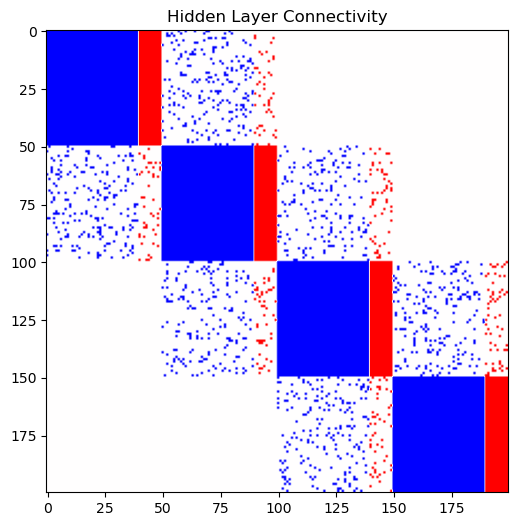

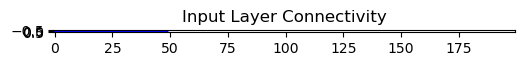

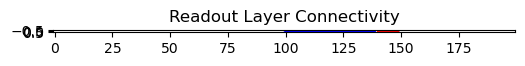

In [51]:
area_connectivities = np.array([
    [1.0, 0.1, 0.0, 0.0],
    [0.1, 1.0, 0.1, 0.0],
    [0.0, 0.1, 1.0, 0.1],
    [0.0, 0.0, 0.1, 1.0],
])

struct_params = {
    "n_areas": 4,
    "exc_pct": 0.8,
    "area_connectivities": area_connectivities,
    "input_areas": [0],
    "readout_areas": [2],
    "input_dim": 1,
    "output_dim": 1,
    "hidden_size": 200,
    "inter_area_connections": [True, True, True, True],
    "inh_output": False,
}

network_struct = MultiAreaEI(**struct_params)
network_struct.visualize()

In [52]:
model_params = {
    # size
    "input_dim": 1,
    "hidden_size": 200,
    "output_dim": 1,
    
    # hyperparameters
    "tau": 50,
    "use_dale": True,
    "scaling": 1.0,
    "dt": 1,
    "activation": "relu",
    "recurrent_noise": 0.05,
    "new_synapses": False,
    "self_connections": False,
    "ei_balance": "synapse",

    # bias and distribution
    "layer_biases": [False, False, False],
    "layer_distributions": ['uniform', 'normal', 'uniform'],

    # masks
    "layer_masks": [network_struct.input_mask, network_struct.hidden_mask, network_struct.readout_mask],
}

Linear Layer: 
   | input_dim:  1
   | output_dim: 200
   | dist:       uniform
   | bias:       False
   | shape:      torch.Size([200, 1])
   | weight_min: 0.0
   | weight_max: 0.9746270179748535
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   0.25



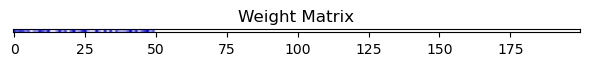

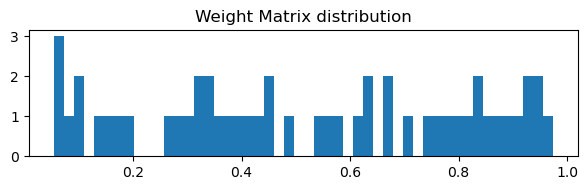

Recurrence: 
   | hidden_min:    0.0
   | hidden_max:    0.0
   | hidden_mean:   0.0
   | preact_noise:  0
   | postact_noise: 0
   | activation:    relu
   | alpha:         0.02

Hidden Layer: 
   | self_connections: False
   | input/output_dim: 200
   | distribution:     normal
   | bias:             False
   | dale:             True
   | shape:            torch.Size([200, 200])
   | weight_min:       -1.5124062299728394
   | weight_max:       0.40002739429473877
   | weight_mean:      -0.0002860356471501291
   | bias_min:         0.0
   | bias_max:         0.0
   | sparsity:         0.28189998865127563
   | scaling:          1.0



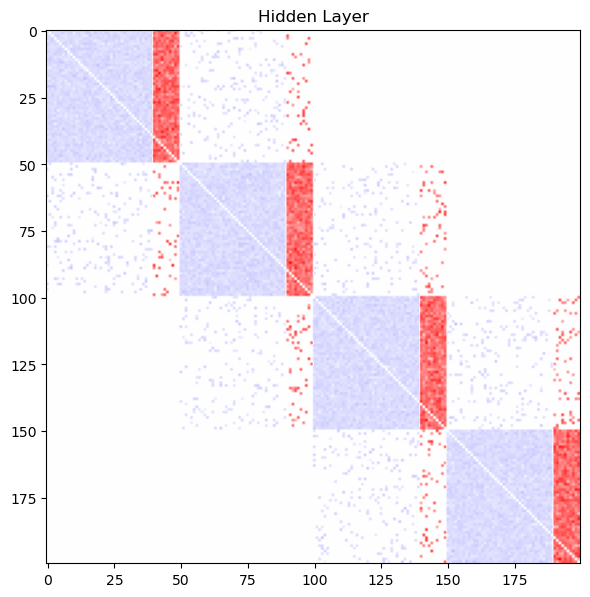

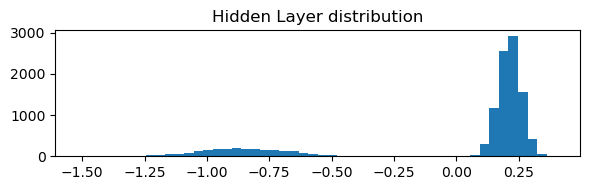

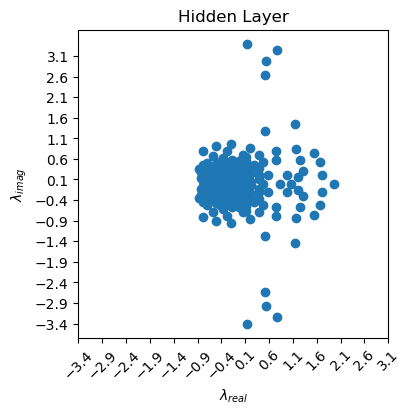

Linear Layer: 
   | input_dim:  200
   | output_dim: 1
   | dist:       uniform
   | bias:       False
   | shape:      torch.Size([1, 200])
   | weight_min: -0.26213333010673523
   | weight_max: 0.27523210644721985
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   0.25



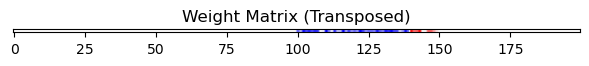

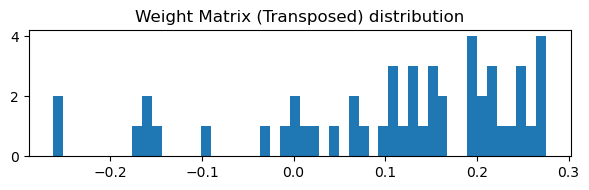

In [53]:
rnn = CTRNN(**model_params)
rnn.print_layers()